<a href="https://colab.research.google.com/github/priyankajuttu/Projects_and_Labs/blob/main/STP_Module_3_Lab_2_Implementing_KNN_from_scratch_and_visualize_Algorithm_performance_by_Om_Kathalkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [ ]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [ ]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [ ]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.

import numpy as np
from collections import Counter

def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    all_k_neighbors_info = []
    for i in range(len(X_test)):
        all_k_neighbors_info.append(get_k_neighbors_info(X_train, y_train, X_test[i, :], k))

    return all_k_neighbors_info

def get_k_neighbors_info(X_train, y_train, X_test, k):
    distances = []

    for i in range(len(X_train)):
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)
    k_neighbors_info = []

    for i in range(k):
        distance = distances[i][0]
        index = distances[i][1]
        label = y_train[index]
        k_neighbors_info.append((distance, label))

    return k_neighbors_info

# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np # Import numpy here if not already imported

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters:
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns:
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = np.ptp(vor.points).max() # Fixed: Changed vor.points.ptp() to np.ptp(vor.points)

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)


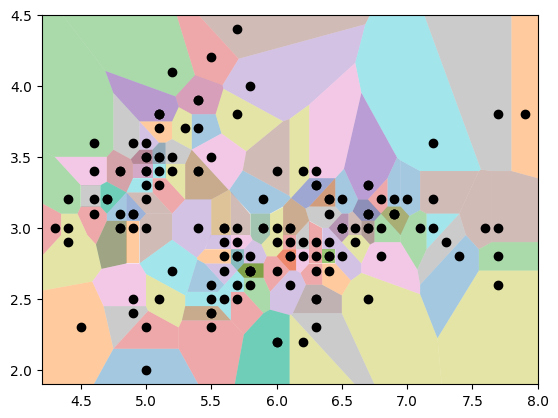

In [ ]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


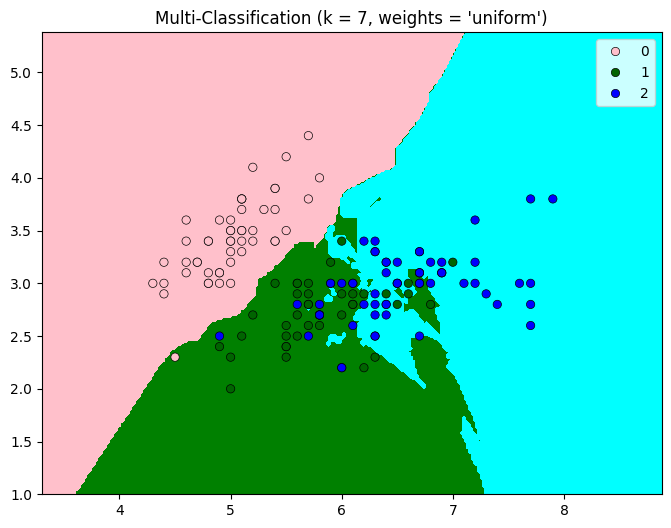

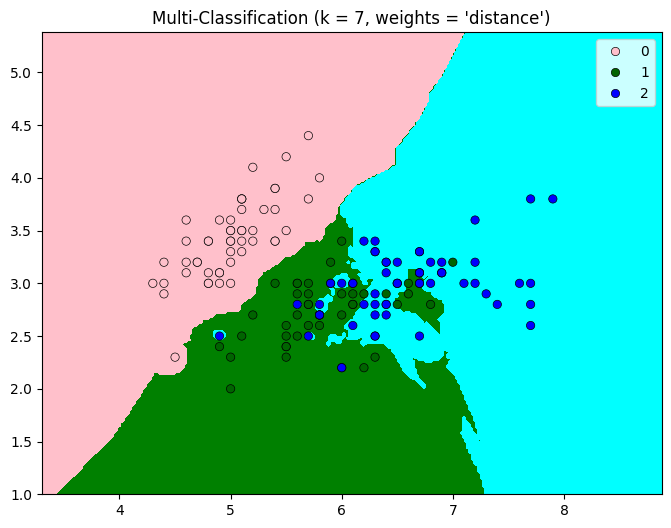

In [ ]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

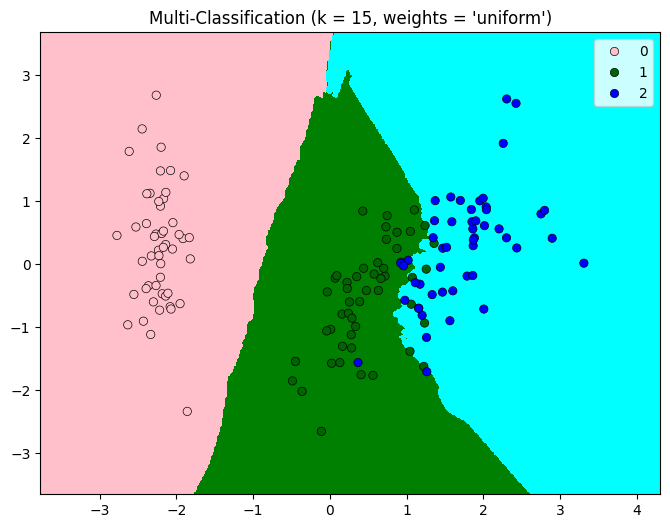

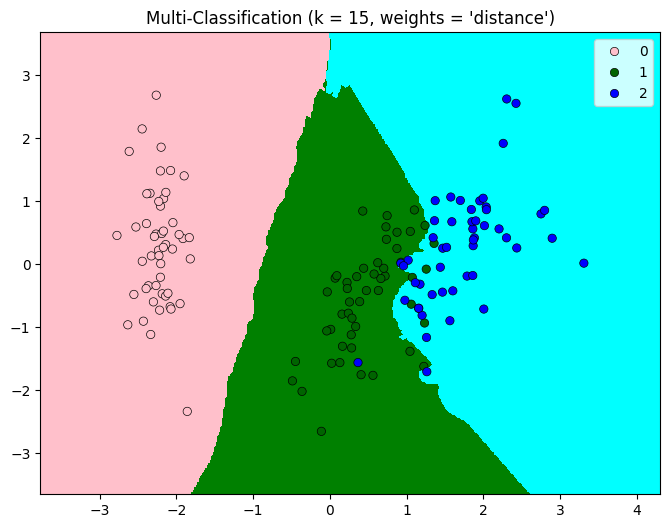

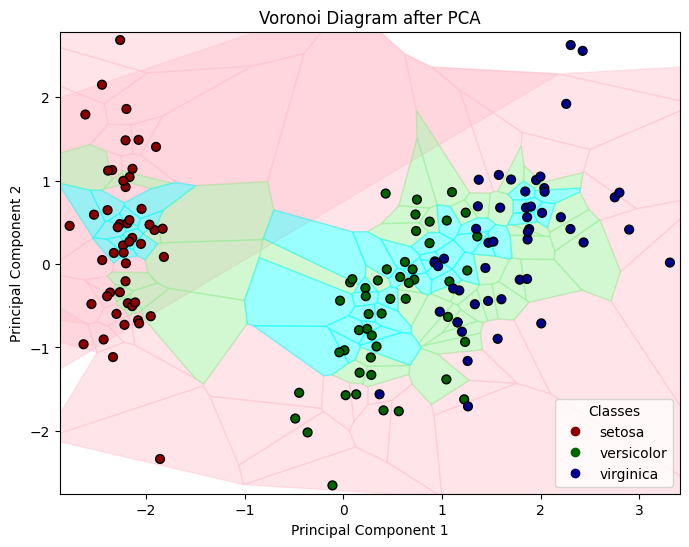

In [ ]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d

# Function to calculate finite regions for Voronoi plot
def voronoi_finite_polygons_2d(vor, radius=None):
    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")
    new_regions = []
    new_vertices = vor.vertices.tolist()
    center = vor.points.mean(axis=0)
    if radius is None:
        radius = np.ptp(vor.points).max() # Corrected: Changed vor.points.ptp() to np.ptp(vor.points)

    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for i, region in enumerate(vor.regions):
        if all(v >= 0 for v in region):
            new_regions.append(region)
            continue

        ridges = all_ridges[i]
        new_region = [v for v in region if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            t = vor.points[i]
            p = vor.points[p2]
            midpoint = (t + p) / 2.0
            direction = p - t
            direction /= np.linalg.norm(direction)
            norm_vector = np.array([-direction[1], direction[0]])

            if vor.point_region[p2] < vor.point_region[i]:
                 norm_vector = -norm_vector

            v_point = vor.vertices[v2]
            dot_product = np.dot(v_point - midpoint, norm_vector)
            if dot_product < 0:
                norm_vector = -norm_vector

            far_point = v_point + norm_vector * radius
            new_vertices.append(far_point.tolist())
            new_region.append(len(new_vertices) - 1)

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)].tolist()

        new_regions.append(new_region)

    return new_regions, np.asarray(new_vertices)

def decision_boundary_plot(x_dec,y_dec,k):
    h = .02
    n = len(set(y_dec))
    cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
    cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

    for weights in ['uniform', 'distance']:
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
        clf.fit(x_dec, y_dec)

        x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
        y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)

        sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                        palette=cmap_bold, alpha=1.0, edgecolor="black")
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

    plt.show()

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_dec = X_pca
y_dec = y
k_neighbors = 15

from sklearn.neighbors import KNeighborsClassifier
decision_boundary_plot(X_dec, y_dec, k_neighbors)

points = X_dec
vor = Voronoi(points)
regions, vertices = voronoi_finite_polygons_2d(vor)
plt.figure(figsize=(8, 6))

for i, region in enumerate(regions):
    polygon = vertices[region]
    color_index = y_dec[i]
    colors = ['pink', 'lightgreen', 'cyan']
    plt.fill(*zip(*polygon), alpha=0.4, color=colors[color_index])

scatter = plt.scatter(points[:,0], points[:,1], c=y_dec,
                      cmap=ListedColormap(['darkred', 'darkgreen', 'darkblue']),
                      edgecolor='k', s=40)

handles, labels = scatter.legend_elements()
plt.legend(handles=handles, labels=target_names.tolist(), title="Classes")

plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Voronoi Diagram after PCA")

plt.show()

## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

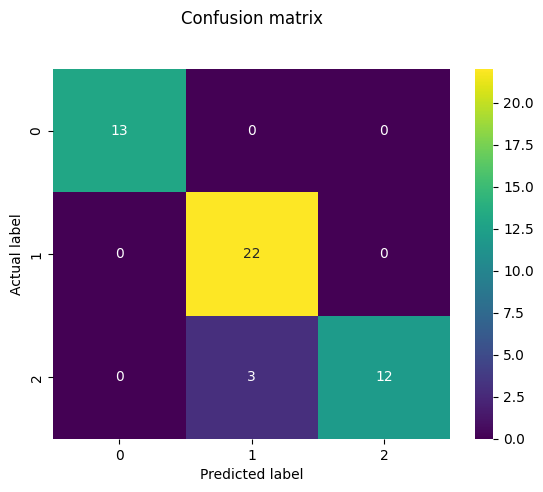

In [ ]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



### **Car Evaluation Dataset**

In [ ]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [ ]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [ ]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


The accuracy of the classifier on Car evaluation dataset is 89.88 %


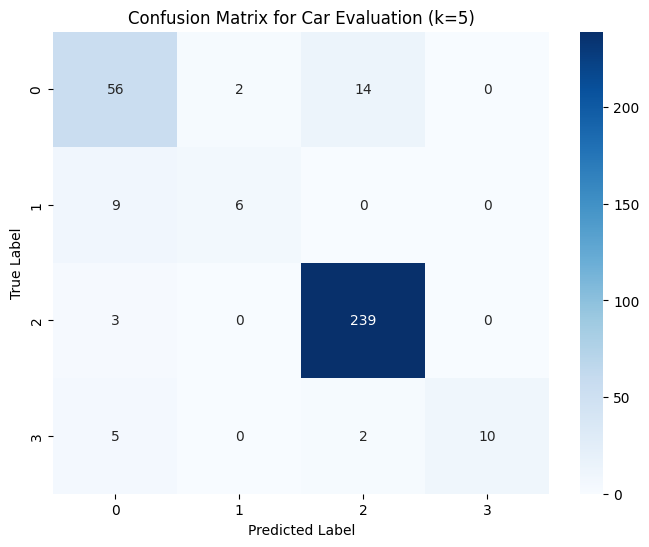

In [ ]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset

for x in car_df.columns:
    le = preprocessing.LabelEncoder()
    le.fit(car_df[x])
    car_df[x] = le.transform(car_df[x])

dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

cm = confusion_matrix(y_test, predictions)

class_labels = np.unique(y)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.title('Confusion Matrix for Car Evaluation (k=5)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset

from sklearn.metrics import classification_report

target_names = [ 'unacceptable', 'acceptable', 'good', 'verygood']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

unacceptable       0.77      0.78      0.77        72
  acceptable       0.75      0.40      0.52        15
        good       0.94      0.99      0.96       242
    verygood       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



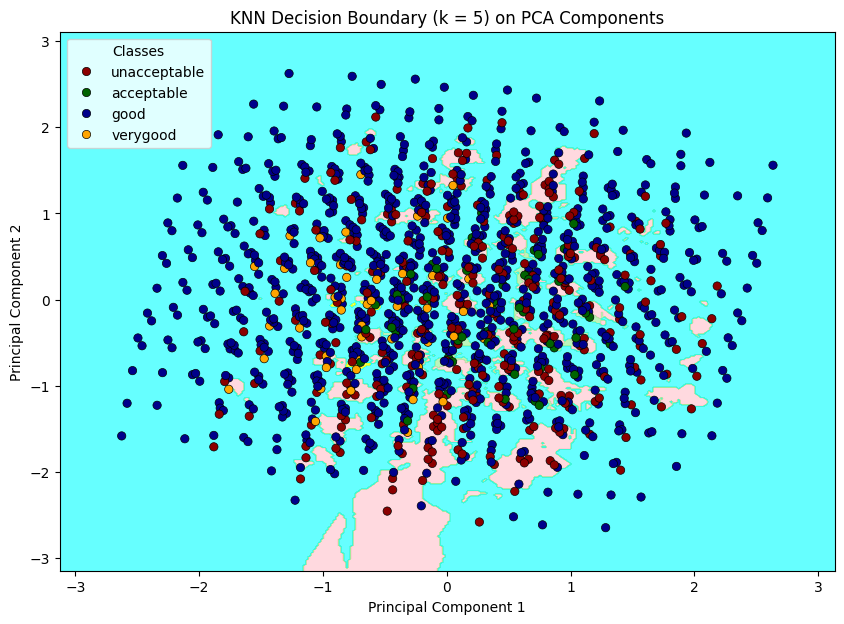

In [ ]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_dec = X_train_pca
y_dec = y_train
k = 5

def plot_pca_decision_boundary(X_dec, y_dec, k):
    h = .02
    n = len(np.unique(y_dec))
    cmap_light = ListedColormap(['pink', 'lightgreen', 'cyan', 'yellow'][:n])
    cmap_bold = ['darkred', 'darkgreen', 'darkblue', 'orange'][:n]

    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_dec, y_dec)

    x_min, x_max = X_dec[:, 0].min() - 0.5, X_dec[:, 0].max() + 0.5
    y_min, y_max = X_dec[:, 1].min() - 0.5, X_dec[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

    sns.scatterplot(x=X_dec[:, 0], y=X_dec[:, 1], hue=y_dec, palette=cmap_bold, alpha=1.0, edgecolor="k", legend='full')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("KNN Decision Boundary (k = %i) on PCA Components" % k)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

    class_names = ['unacceptable','acceptable', 'good', 'verygood']
    handles, labels = plt.gca().get_legend_handles_labels()
    if len(labels) == len(class_names):
        plt.legend(handles, class_names, title="Classes")
    else:
        plt.legend(handles[1:], class_names, title="Classes")

    plt.show()

plot_pca_decision_boundary(X_dec, y_dec, k)

In [ ]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset

## **Homework Assignment: Exploring Distance Metrics and KNN**

---

### **Problem 1: Implementing Custom Distance Metrics**

In this exercise, you'll implement distance metrics from scratch to deepen your understanding.

**Task 1.1:** Implement the Minkowski distance formula without using any library functions (except basic numpy operations).

Recall that Minkowski distance is defined as:

$$d(x, x') = \left(\sum_{j=1}^{D} |x_j - x'_j|^p\right)^{1/p}$$

where $p$ is a parameter. When $p=1$, it's Manhattan distance, and when $p=2$, it's Euclidean distance.

In [ ]:
## HOMEWORK TASK 1.1
## Implement the Minkowski distance function below
## Test it with p=1 (should match Manhattan) and p=2 (should match Euclidean)
## Expected number of lines: 3-5

from scipy.spatial import distance

def minkowski_distance(x1, x2, p):
    """
    Calculate Minkowski distance between two points.

    Parameters:
    x1, x2: numpy arrays representing points
    p: the order of the Minkowski distance

    Returns:
    float: the Minkowski distance
    """
    # Write your code here
    return np.power(np.sum(np.power(np.abs(x1 - x2), p)), 1/p)

# Test your implementation
x_1 = np.array([1, 2, 3])
x_2 = np.array([4, 6, 8])

x_1_numeric = x_1.astype(float)
x_2_numeric = x_2.astype(float)

# Test with p=1 (Manhattan)
print("Minkowski distance (p=1):", minkowski_distance(x_1_numeric, x_2_numeric, 1))
print("Manhattan distance:", distance.cityblock(x_1, x_2))
print()

# Test with p=2 (Euclidean)
print("Minkowski distance (p=2):", minkowski_distance(x_1_numeric, x_2_numeric, 2))
print("Euclidean distance:", distance.euclidean(x_1, x_2))

Minkowski distance (p=1): 12.0
Manhattan distance: 12

Minkowski distance (p=2): 7.0710678118654755
Euclidean distance: 7.0710678118654755


---

### **Problem 2: Visualizing Decision Boundaries**

Understanding how KNN makes predictions is crucial. In this exercise, you'll visualize decision boundaries for different values of K.

**Task 2.1:** Create a function that visualizes the decision boundary of a KNN classifier on 2D data.

**Hint:** You'll need to:
1. Create a mesh grid covering the feature space
2. Train a KNN classifier
3. Predict the class for each point in the mesh
4. Plot the results using `plt.contourf()` for the decision boundary
5. Overlay the training data points

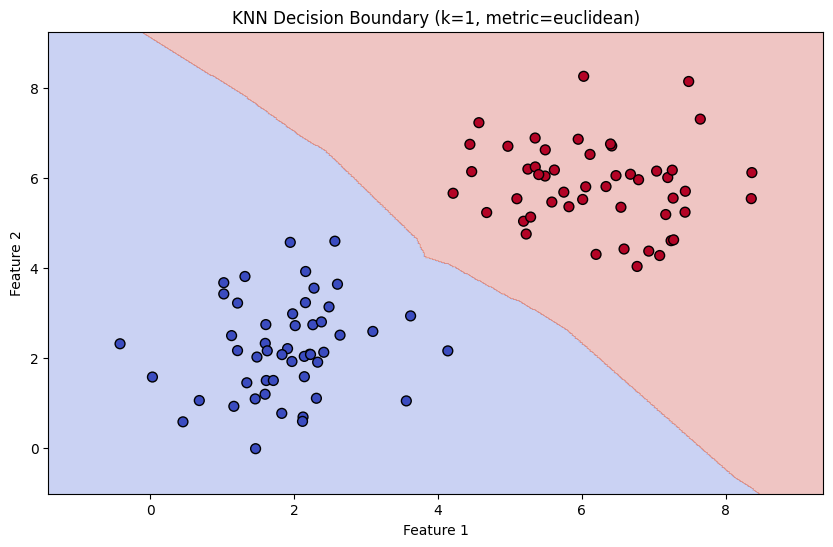

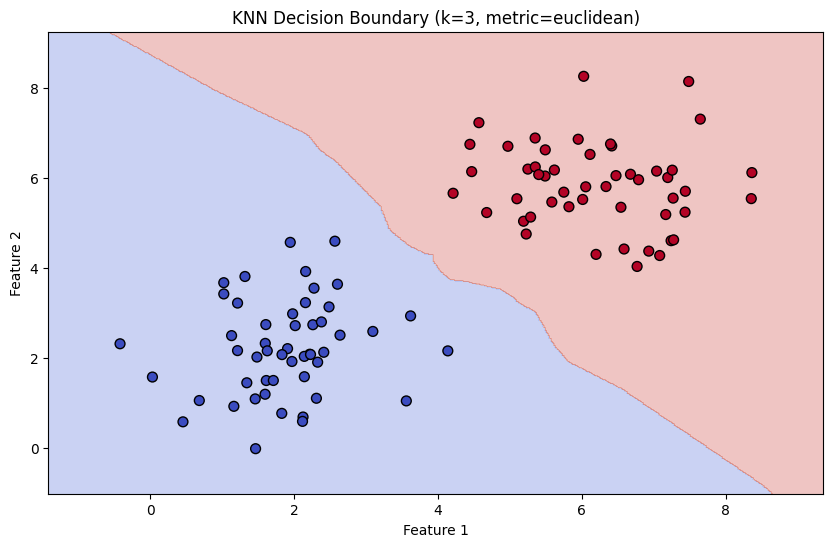

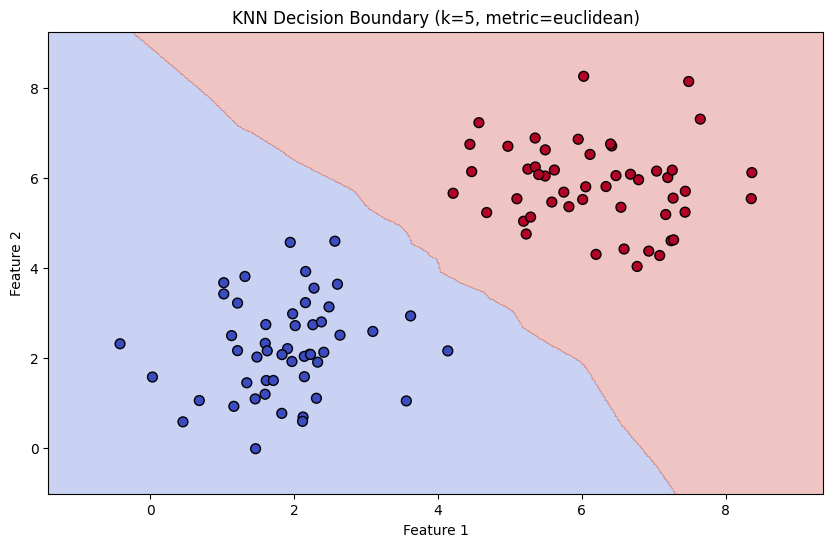

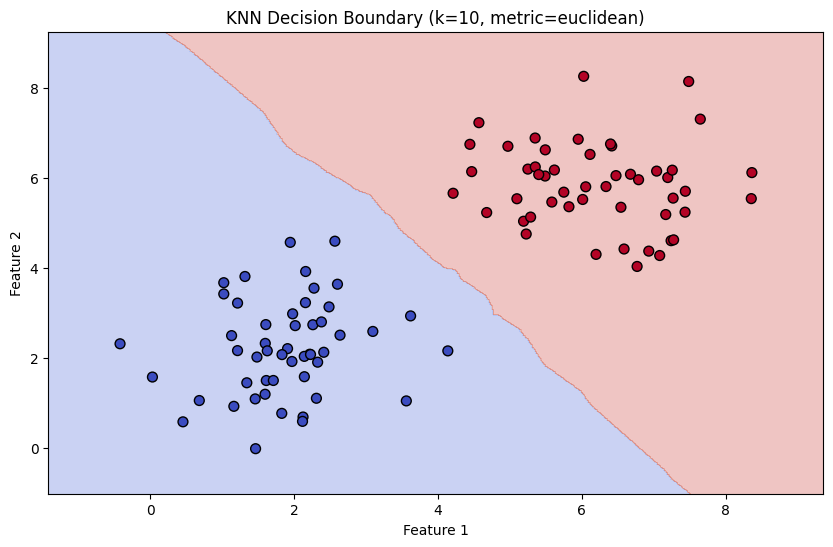

In [ ]:
## HOMEWORK TASK 2.1
## Complete the function below to visualize KNN decision boundaries
## The function should create a mesh grid and predict class for each point

def plot_decision_boundary(X, y, k_value, metric='euclidean'):
    """
    Plot the decision boundary for KNN classifier.

    Parameters:
    X: Training data (n_samples, 2)
    y: Training labels
    k_value: Number of neighbors for KNN
    metric: Distance metric to use
    """
    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Train KNN classifier
    # Write your code here to create and train KNN model
    model = KNeighborsClassifier(n_neighbors=k_value, metric=metric)
    model.fit(X, y)

    # Predict for each point in mesh
    # Write your code here to make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and training points
    plt.figure(figsize=(10, 6))
    # Write your code here to plot contours and scatter points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.coolwarm, edgecolors='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KNN Decision Boundary (k={k_value}, metric={metric})')
    plt.show()

def generate_synth_data(n=50):
    """
    Generate synthetic 2D data with two classes.
    """
    # Class 0 cluster
    x1 = np.random.randn(n, 2) + np.array([2, 2])
    y1 = np.zeros(n)

    # Class 1 cluster
    x2 = np.random.randn(n, 2) + np.array([6, 6])
    y2 = np.ones(n)

    # Combine
    X = np.vstack((x1, x2))
    y = np.hstack((y1, y2))

    return X, y

# Generate synthetic data
n = 50
pts, tgts = generate_synth_data(n)

# Test with different k values
for k in [1, 3, 5, 10]:
    plot_decision_boundary(pts, tgts, k)

**Discussion Questions:**
1. What happens to the decision boundary as K increases? Is it smoother or more irregular?
2. Which K value seems to generalize better without overfitting?
3. Try changing the metric to 'manhattan' - how does the boundary change?

---

### **Problem 3: Impact of Distance Metrics on High-Dimensional Data**

The "curse of dimensionality" affects distance metrics differently. Let's explore this phenomenon.

**Task 3.1:** Create a function that generates random high-dimensional data and compares how different distance metrics behave as dimensionality increases.

**Background:** In high dimensions, the ratio between the maximum and minimum distances between points tends to approach 1, making it harder to distinguish between near and far neighbors. This affects different metrics differently.

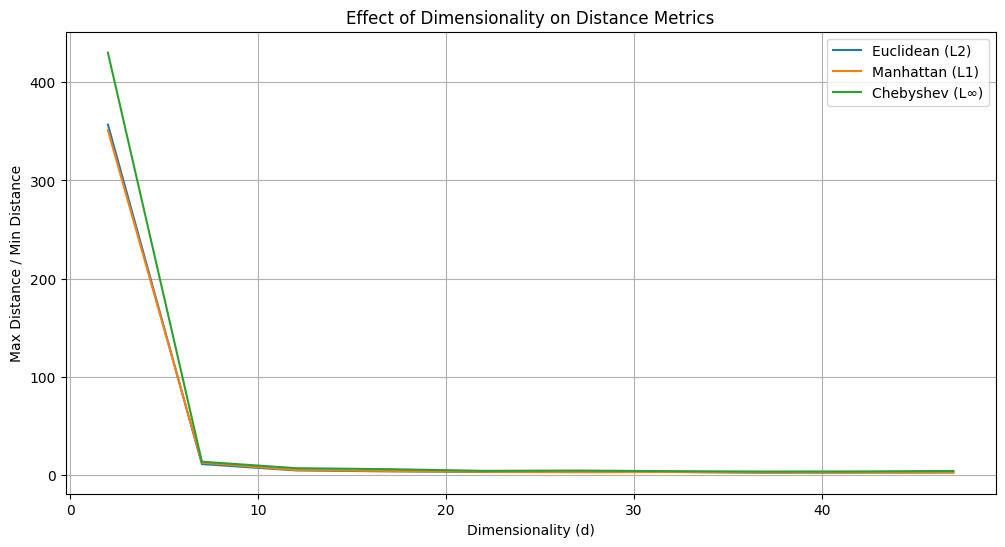

In [ ]:
## HOMEWORK TASK 3.1
## Complete the function to analyze distance metrics in high dimensions
## Calculate the ratio of max distance to min distance for each metric


from scipy.spatial.distance import cdist

def analyze_distance_in_high_dims(max_dim=50, n_points=100):
    """
    Analyze how distance metrics behave in high dimensions.

    Parameters:
    max_dim: Maximum dimensionality to test
    n_points: Number of random points to generate

    Returns:
    Dictionary with results for each metric
    """
    dimensions = range(2, max_dim+1, 5)
    results = {
        'euclidean': [],
        'manhattan': [],
        'chebyshev': []
    }

    for dim in dimensions:
        # Generate random points
        points = np.random.randn(n_points, dim)

        # Calculate all pairwise distances for each metric
        # Write your code here to compute distances and calculate ratioe
        dist_euclid = cdist(points, points, metric='euclidean')
        dist_manhat = cdist(points, points, metric='cityblock')
        dist_cheby  = cdist(points, points, metric='chebyshev')

        def ratio(dist_matrix):
            vals = dist_matrix[np.triu_indices(n_points, k=1)]
            return vals.max() / vals.min()

        results['euclidean'].append(ratio(dist_euclid))
        results['manhattan'].append(ratio(dist_manhat))
        results['chebyshev'].append(ratio(dist_cheby))

    # Plot results
    plt.figure(figsize=(12, 6))
    # Write your code here to plot the results
    plt.plot(list(dimensions), results['euclidean'], label='Euclidean (L2)')
    plt.plot(list(dimensions), results['manhattan'], label='Manhattan (L1)')
    plt.plot(list(dimensions), results['chebyshev'], label='Chebyshev (L∞)')

    plt.xlabel("Dimensionality (d)")
    plt.ylabel("Max Distance / Min Distance")
    plt.title("Effect of Dimensionality on Distance Metrics")
    plt.legend()
    plt.grid(True)
    plt.show()

    return results

# Run the analysis
results = analyze_distance_in_high_dims()

### Questions to Think About and Answer
1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.  
2. What do you think could be the drawbacks of using KNN ?

# **Answers**:

1. Difference between uniform and distance weights:
- **uniform:** all K neighbors contribute equally to the prediction.
- **distance:** closer neighbors have higher influence, reducing the effect of far-away points.

2. Drawbacks of KNN:
- It becomes slow for large datasets since every prediction requires distance computation to all points.
- It performs poorly in high-dimensional data due to distance concentration (curse of dimensionality).

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
